In [1]:
import numpy as np
from qiskit import *

In [5]:
backend = BasicAer.get_backend('unitary_simulator')

In [4]:
q = QuantumRegister(1)
qc = QuantumCircuit(q)
qc.id(q)
qc.draw()

┌───┐
q1: ┤ I ├
    └───┘

In [6]:
job = backend.run(transpile(qc, backend))
job.result().get_unitary(qc, decimals=3)

array([[1.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j]])

In [10]:
q = QuantumRegister(1)
print(q)

QuantumRegister(1, 'q5')


In [9]:
qc.draw()

┌───┐
q1: ┤ I ├
    └───┘

In [12]:
circ = QuantumCircuit(3)
circ.draw()

q_0: 
     
q_1: 
     
q_2:

In [17]:
from qiskit.quantum_info import Statevector
from numpy import sqrt

u = Statevector([1 / sqrt(2), 1 / sqrt(2)])
v = Statevector([(1 + 2.0j) / 3, -2 / 3])
w = Statevector([1 / 3, 2 / 3])

print("State vectors u, v, and w have been defined.")

State vectors u, v, and w have been defined.


In [18]:
display(u.draw("latex"))
display(v.draw("text"))

<IPython.core.display.Latex object>

[ 0.33333333+0.66666667j,-0.66666667+0.j        ]

In [28]:
v.measure()

('0',
 Statevector([0.4472136+0.89442719j, 0.       +0.j        ],
             dims=(2,)))

In [29]:
v.measure()

('1',
 Statevector([ 0.+0.j, -1.+0.j],
             dims=(2,)))

In [30]:
v.measure()

('0',
 Statevector([0.4472136+0.89442719j, 0.       +0.j        ],
             dims=(2,)))

In [38]:
v = Statevector([(1 + 2.0j) / 3, -2 / 3])
v.draw("latex")

<IPython.core.display.Latex object>

In [39]:
v.measure()

('1',
 Statevector([ 0.+0.j, -1.+0.j],
             dims=(2,)))

In [33]:
v.measure()

('0',
 Statevector([0.4472136+0.89442719j, 0.       +0.j        ],
             dims=(2,)))

In [34]:
v.measure()

('1',
 Statevector([ 0.+0.j, -1.+0.j],
             dims=(2,)))

{'0': 542, '1': 458}

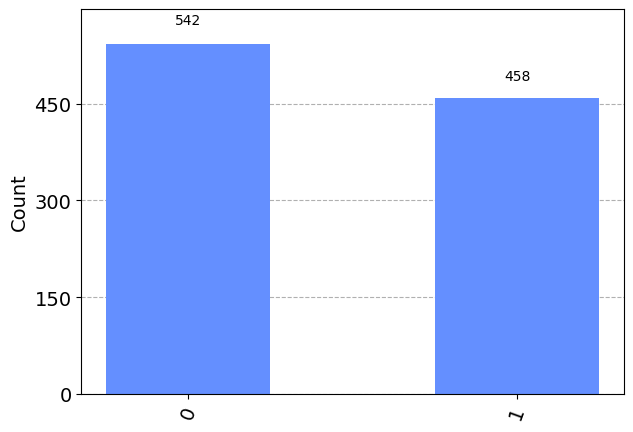

In [40]:
from qiskit.visualization import plot_histogram

statistics = v.sample_counts(1000)
display(statistics)
plot_histogram(statistics)

In [42]:
from qiskit.quantum_info import Operator

X = Operator([[0, 1], [1, 0]])
Y = Operator([[0, -1.0j], [1.0j, 0]])
Z = Operator([[1, 0], [0, -1]])
H = Operator([[1 / sqrt(2), 1 / sqrt(2)], [1 / sqrt(2), -1 / sqrt(2)]])
S = Operator([[1, 0], [0, 1.0j]])
T = Operator([[1, 0], [0, (1 + 1.0j) / sqrt(2)]])

v = Statevector([1, 0])

v = v.evolve(H)
v = v.evolve(T)
v = v.evolve(H)
v = v.evolve(T)
v = v.evolve(Z)

v.draw("text")

[ 0.85355339+0.35355339j,-0.35355339+0.14644661j]

In [41]:
from qiskit import QuantumCircuit
circuit = QuantumCircuit(1)

circuit.h(0)
circuit.t(0)
circuit.h(0)
circuit.t(0)
circuit.z(0)

circuit.draw()

┌───┐┌───┐┌───┐┌───┐┌───┐
q: ┤ H ├┤ T ├┤ H ├┤ T ├┤ Z ├
   └───┘└───┘└───┘└───┘└───┘

In [43]:
ket0 = Statevector([1, 0])
v = ket0.evolve(circuit)
v.draw("text")

[ 0.85355339+0.35355339j,-0.35355339+0.14644661j]

In [44]:
help(Statevector.from_label)

Help on method from_label in module qiskit.quantum_info.states.statevector:

from_label(label: 'str') -> 'Statevector' method of qiskit.quantum_info.operators.mixins.tolerances.TolerancesMeta instance
    Return a tensor product of Pauli X,Y,Z eigenstates.
    
    .. list-table:: Single-qubit state labels
       :header-rows: 1
    
       * - Label
         - Statevector
       * - ``"0"``
         - :math:`[1, 0]`
       * - ``"1"``
         - :math:`[0, 1]`
       * - ``"+"``
         - :math:`[1 / \sqrt{2},  1 / \sqrt{2}]`
       * - ``"-"``
         - :math:`[1 / \sqrt{2},  -1 / \sqrt{2}]`
       * - ``"r"``
         - :math:`[1 / \sqrt{2},  i / \sqrt{2}]`
       * - ``"l"``
         - :math:`[1 / \sqrt{2},  -i / \sqrt{2}]`
    
    Args:
        label (string): a eigenstate string ket label (see table for
                        allowed values).
    
    Returns:
        Statevector: The N-qubit basis state density matrix.
    
    Raises:
        QiskitError: if the label conta